# Trajectory Reduction with Scanpy External API

## Set environment

In [24]:
import scanpy as sc
import numpy as np
import pandas as pd
import scanpy.external as sce

In [11]:
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays
%config InlineBackend.print_figure_kwargs = {'dpi': 200}  # Set DPI

In [8]:
sc.settings.figdir = "../../results/trajectory/20241119_trajectory_embedding/"

## Preprocess

In [2]:
mes = sc.read("../../processed_data/integrated_data/20241118_mes.h5ad")

We excluded low quality cells here to avoid interference/noise in the downstream analysis

In [ ]:
lowqualitycell_1 = mes.obs_names[mes.obs["C9_named"].isin(["Low quality","Epithelium-like","Vascular-like"])]

In [ ]:
lowqualitycell_2 = mes.obs_names[mes.obs["C19_named"].isin(["High-Mito","Low quality 2","Low quality","Vascular-like"])]

In [ ]:
lowquality = np.unique(np.concatenate((lowqualitycell_1, lowqualitycell_2)))

In [ ]:
len(lowquality)

In [ ]:
mes = mes[~mes.obs_names.isin(lowquality)].copy()

In [21]:
keepName = mes.obs_names

In [23]:
pd.DataFrame(keepName).to_csv('../../processed_data/framework/attributeName/cellName_mes_keep20241119.csv')

In [ ]:
#mes.write_h5ad("../../processed_data/integrated_data/20241118_mes.h5ad")

## Force-directed graph

We utilized the `draw_graph` function from the `scanpy` package to generate a force-directed graph layout. Compared to tSNE and UMAP, force-directed graphs provide better representation of global topology, making it our preferred method for visualization

In [ ]:
mes.obsm["X_X_SCANVI"].shape

In [ ]:
sc.pp.neighbors(mes, n_neighbors=10, n_pcs=30,use_rep="X_X_SCANVI")
sc.tl.draw_graph(mes)

2024-11-18 21:48:02.574054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-18 21:48:04.129248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


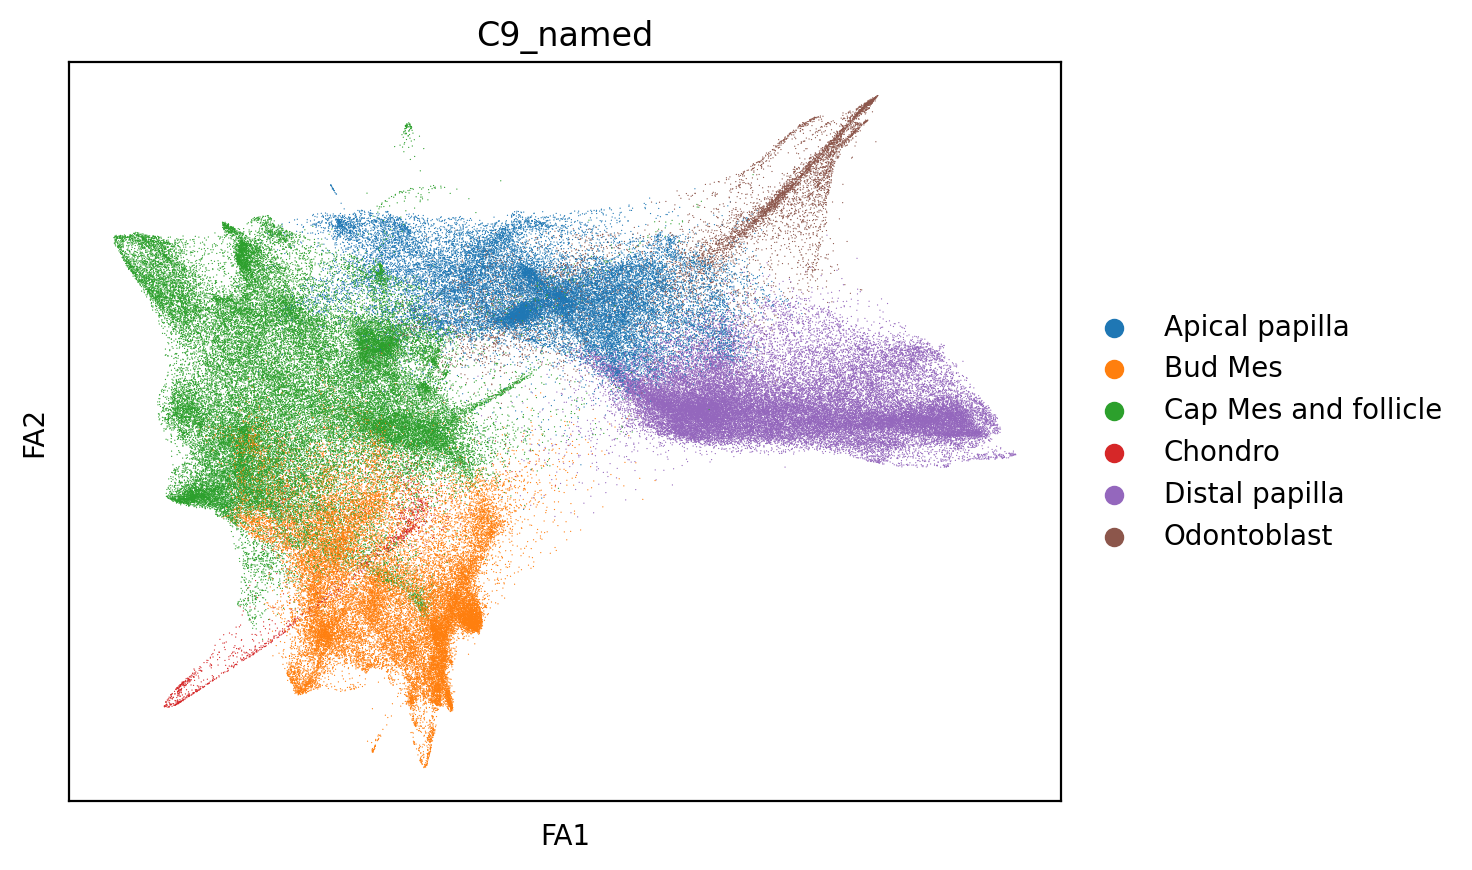

In [12]:
sc.pl.draw_graph(mes,color = "C9_named",save = "_C7_named")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


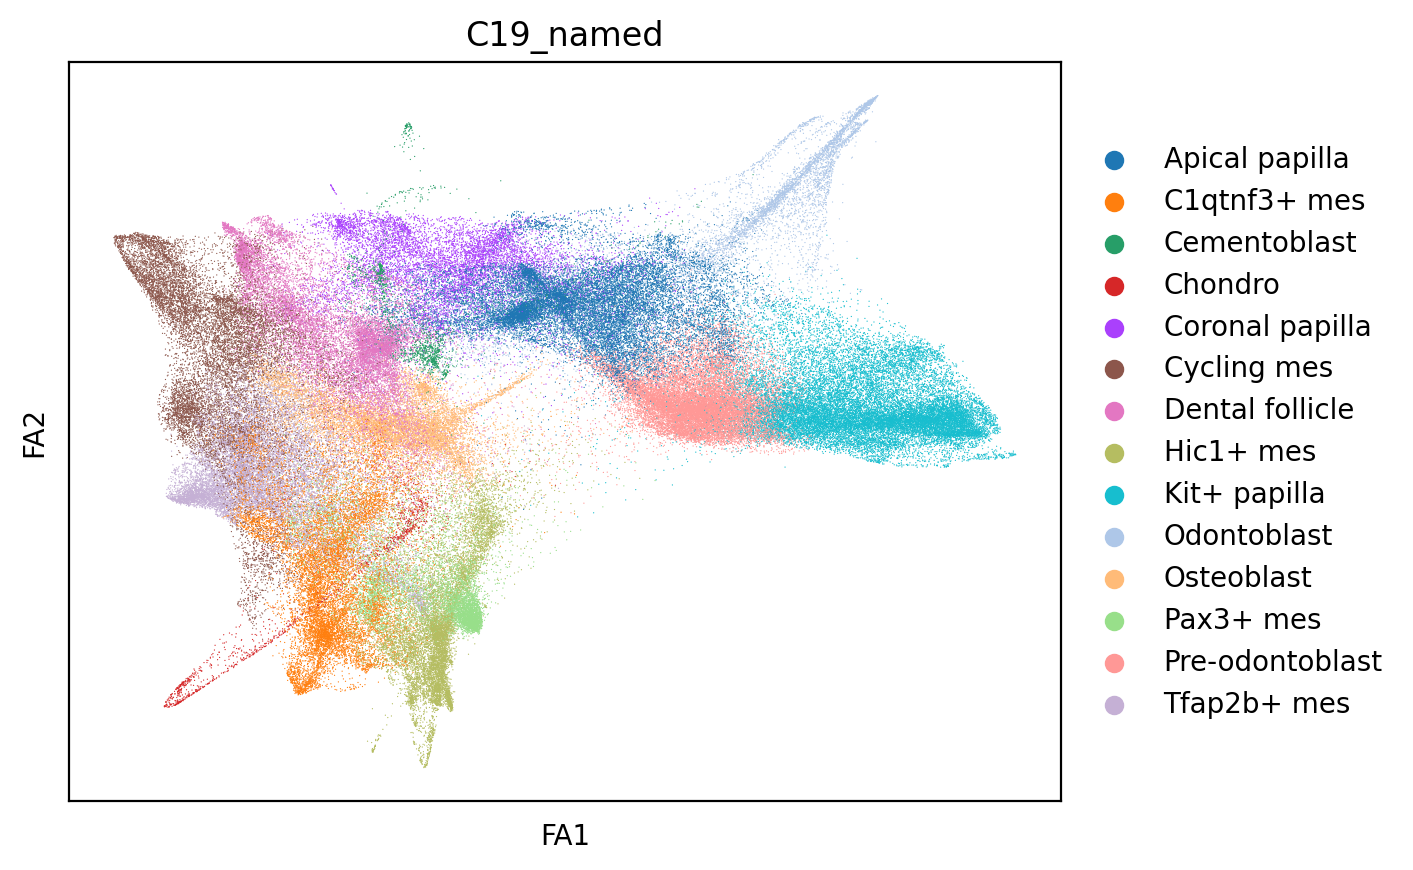

In [13]:
sc.pl.draw_graph(mes,color = "C19_named",save = "_C19_named")

In [17]:
mesDrawgraph = pd.DataFrame(mes.obsm["X_draw_graph_fa"])

In [19]:
mesDrawgraph.index = mes.obs_names

In [20]:
mesDrawgraph.to_csv("../../processed_data/framework/embedding/20241119_mes_drawgraph.csv")

## Trimap

We also performed dimensionality reduction using [TriMap](https://scanpy.readthedocs.io/en/stable/external/generated/scanpy.external.tl.trimap.html), a method that leverages triplet constraints to generate low-dimensional embeddings. This analysis was implemented through the external API functions in scanpy.

In [29]:
mes.obsm["X_pca"] = mes.obsm["X_X_SCANVI"]

In [30]:
mes = sce.tl.trimap(mes, copy=True)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/trimap/trimap_.py:747: UserWarning: 'weight_adj' is deprecated and will not be applied. Adjust 'weight_temp' if needed.
  warnings.warn(


TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, weight_temp=0.5, lr=1000.0, n_iters=400, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 152988 points with dimension 30
pre-processing
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100 /  400, Loss: 0.100, Violated triplets: 4.0170
Iteration:  200 /  400, Loss: 0.092, Violated triplets: 4.0113
Iteration:  300 /  400, Loss: 0.088, Violated triplets: 4.2001
Iteration:  400 /  400, Loss: 0.086, Violated triplets: 4.2712
Elapsed time: 0:02:59.040066


In [31]:
mes

AnnData object with n_obs × n_vars = 152988 × 36303
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 'leiden_

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


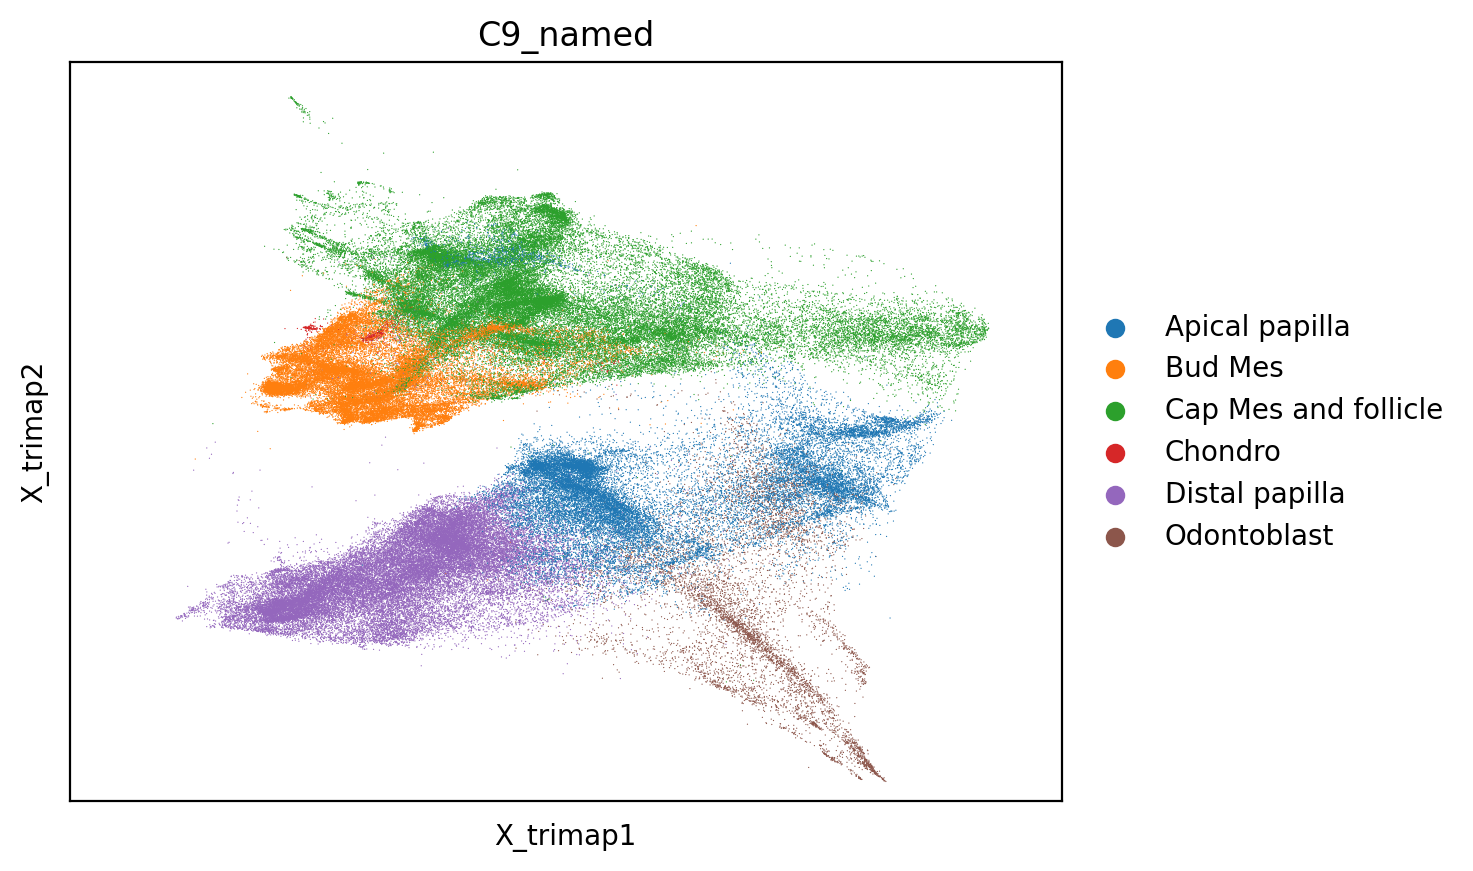

In [50]:
import matplotlib.pyplot as plt
fig = sc.pl.embedding(mes,color = "C9_named",basis="X_trimap",return_fig=True)
ax = fig.axes[0]  # get the axis object
ax.set_xlim([-1000, 1200])
ax.set_ylim([-2200, 2200])
plt.savefig("../../results/trajectory/20241119_trajectory_embedding/X_trimap_trimap_C9_named.pdf")
plt.show()

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


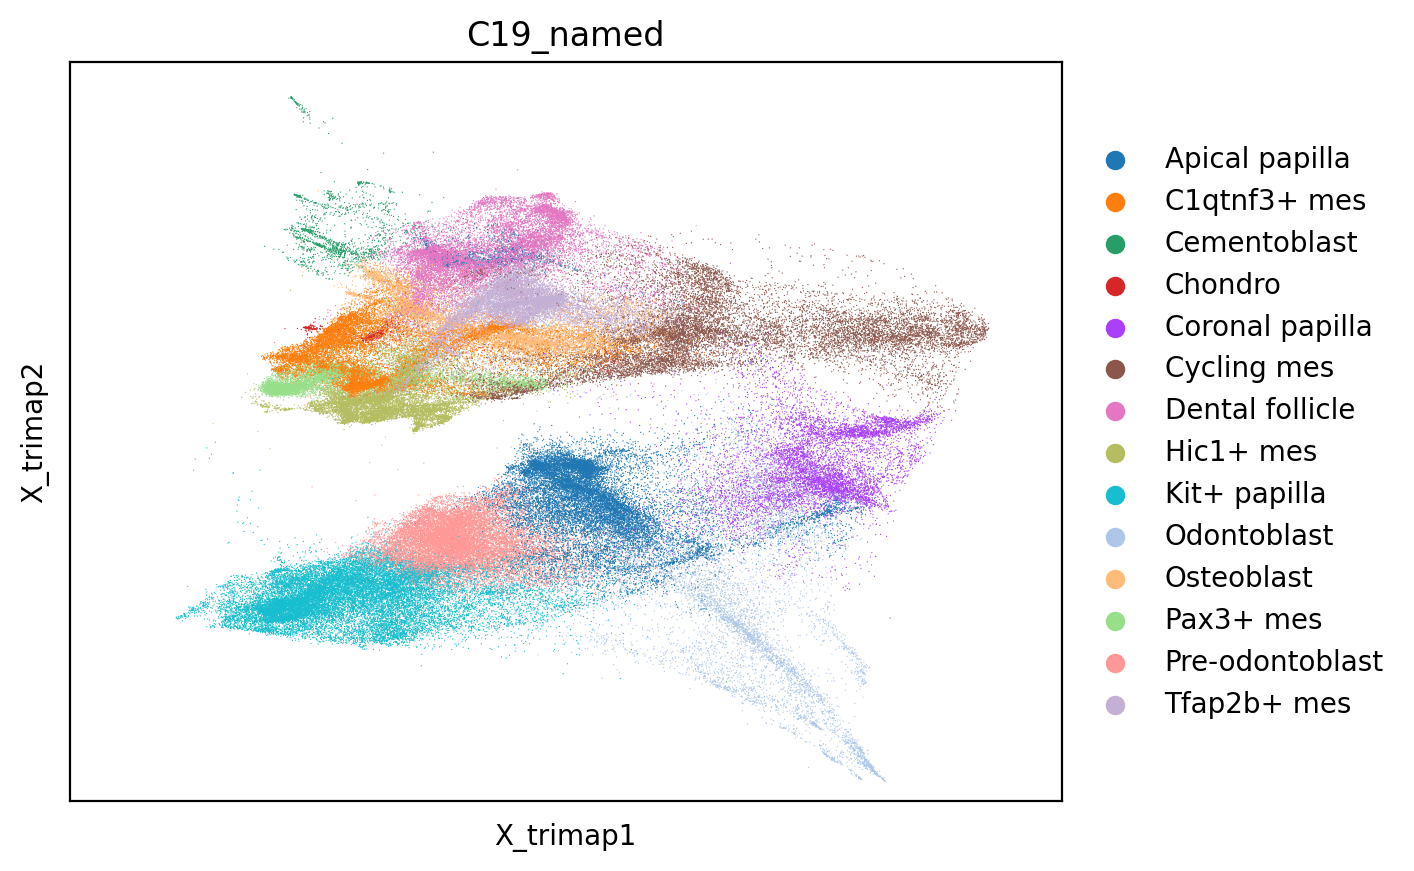

In [51]:
import matplotlib.pyplot as plt
fig = sc.pl.embedding(mes,color = "C19_named",basis="X_trimap",return_fig=True)
ax = fig.axes[0]  # get the axis object
ax.set_xlim([-1000, 1200])
ax.set_ylim([-2200, 2200])
plt.savefig("../../results/trajectory/20241119_trajectory_embedding/X_trimap_trimap_C19_named.pdf")
plt.show()

In [40]:
mes.obsm["X_trimap"]

array([[-298.38614,  190.61903],
       [-415.84912,  245.58986],
       [-322.4213 ,  234.21935],
       ...,
       [-483.30304, -873.799  ],
       [ -96.97388, -964.0854 ],
       [-533.9885 , -827.86896]], dtype=float32)

In [52]:
mesTrimap = pd.DataFrame(mes.obsm["X_trimap"])

In [53]:
mesTrimap.to_csv("../../processed_data/framework/embedding/20241119_mes_trimap.csv")

## phate

We applied [PHATE (Potential of Heat-diffusion for Affinity-based Trajectory Embedding)](https://scanpy.readthedocs.io/en/stable/external/generated/scanpy.external.tl.phate.html), a dimensionality reduction method specifically designed to visualize biological progressions in single-cell data by embedding high-dimensional data into two or three dimensions.

In [56]:
sce.tl.phate(mes, k=10, a=20, t=150)

/home/gilberthan/.local/lib/python3.8/site-packages/phate/phate.py:186: FutureWarning: k is deprecated. Please use knn in future.
  warnings.warn("k is deprecated. Please use knn in future.", FutureWarning)
/home/gilberthan/.local/lib/python3.8/site-packages/phate/phate.py:190: FutureWarning: a is deprecated. Please use decay in future.
  warnings.warn("a is deprecated. Please use decay in future.", FutureWarning)


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


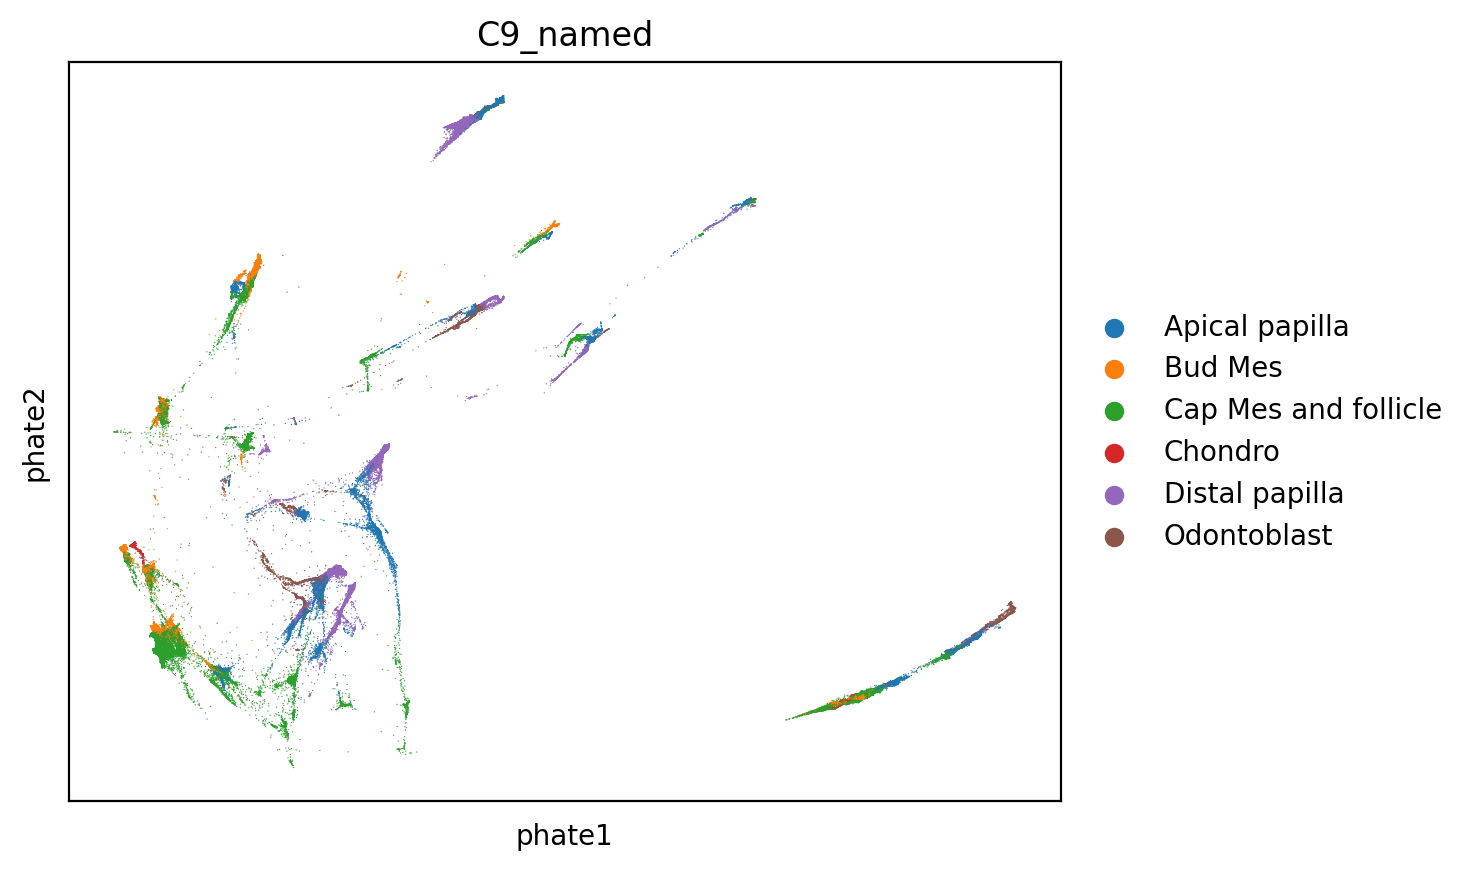

In [59]:
sce.pl.phate(mes,color = "C9_named",save = "_C9_named")

In [61]:
mesPhate = pd.DataFrame(mes.obsm["X_phate"])
mesPhate.index = mes.obs_names

In [62]:
mesPhate.to_csv("../../processed_data/framework/embedding/20241119_mes_phate.csv")

In [ ]:
mesSCANVI = pd.DataFrame(mes.obsm["X_X_SCANVI"])
mesSCANVI.index = mes.obs_names
mesSCANVI.to_csv("../../processed_data/framework/embedding/20241119_mes_scanvi.csv")